# Анализ данных по покупке билетов для Яндекс Афиши

Автор: Спектор Николай

Дата: 17.05.2025

# Цели и задачи проекта

Основные цели: 

- причины общего изменения в пользовательском спросе; 
- разобраться, какие события стали привлекать больше зрителей, а какие организаторы и площадки выбились в лидеры; 
- понять, отличаются ли своей активностью пользователи мобильных устройств от клиентов, которые бронируют билеты со стационарного компьютера;
- интерпретировать результаты, сделать общий вывод и сформировать рекомендации.

Для достижения этих целей нужно решить следующие задачи:

- Оценить объем данных, проверить на пропуски и дубликаты, корректность типов данных и выбросы.
- Объединить данные в один датафрейм и создать новые столбцы с приведением данных по выручке к единой валюте, с выручкой с продажи одного билета, месяцем и сезоном.
- Проанализировать количество заказов в разрезе типов миропрития, устройства и возрастному рейтингу.
- Изучить активность пользователей осенью 2024 г.
- Изучить, как распределены события по регионам и партнерам.
- Выбрать тип t-теста и уровень статистической значимости для проверки гипотез.
- Проверить несколько гипотез относительно активности пользователей мобильных и стационарных устройств по среднему количеству заказов и среднему времени между заказами.
- Интерпретировать результаты, сделать общий вывод и сформировать рекомендации.

# Загрузка данных и знакомство с ними

In [141]:
#Импортируем все необходимые библиотеки для дальнейшей работы:

import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats as st

import numpy as np

from statsmodels.stats.proportion import proportions_ztest

In [142]:
#Выведим данные о датафрейме про заказы:

df_orders = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')

df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [143]:
#Выведим данные о датафрейме про заказы:

df_events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')

df_events.info()
df_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


Данные загружены. Пропуски есть только в поле days_since_prev, но в этом столбце пропуски допустимы. Типы данных почти все корректны за исключением двух столбоцв (created_dt_msk и created_ts_msk), их нужно привезти к типу даты.

In [144]:
df_orders['created_dt_msk'] = pd.to_datetime(df_orders['created_dt_msk'])

In [145]:
df_orders['created_ts_msk'] = pd.to_datetime(df_orders['created_ts_msk'])

# Предобработка данных и подготовка их к исследованию

In [146]:
#Узнаем есть ли дубликаты в паре user_id и order_id:

df_orders.duplicated(subset=['user_id', 'order_id']).sum()

0

In [147]:
#Узнаем есть ли дубликаты в поле order_id:

df_orders['order_id'].nunique()

290849

Неявные дубликаты отсутствуют.

In [148]:
#Узнаем количество уникальных значений event_id, чтобы понять, есть ли дубликаты:

df_events['event_id'].nunique()

22427

В датафрейме event_id неявные дубликаты отсутствуют.

In [149]:
#Создадим датафрейм только с рублевыми заказами и только с заказами в тенге, чтобы проверить их на выбросы по полю currency_code:

df_rub = df_orders[df_orders['currency_code']=='rub'].copy()

In [150]:
df_kzt = df_orders[df_orders['currency_code']=='kzt'].copy()

Text(0, 0.5, 'Выручка')

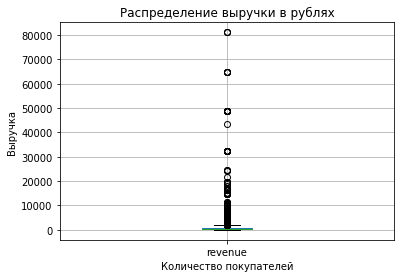

In [151]:
#Проверим данные на выбросы:

df_rub.boxplot('revenue');

plt.title('Распределение выручки в рублях')
plt.xlabel('Количество покупателей')
plt.ylabel('Выручка')

Text(0, 0.5, 'Выручка')

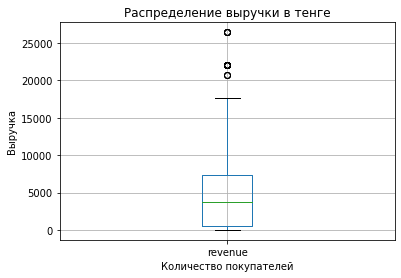

In [152]:
df_kzt.boxplot('revenue');

plt.title('Распределение выручки в тенге')
plt.xlabel('Количество покупателей')
plt.ylabel('Выручка')

Text(0, 0.5, 'Выручка')

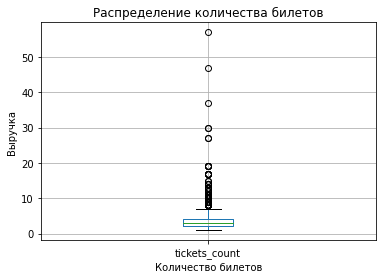

In [153]:
#Также проверим данные на выбросы по полю tickets_count:

df_orders.boxplot('tickets_count');

plt.title('Распределение количества билетов')
plt.xlabel('Количество билетов')
plt.ylabel('Выручка')

Выбросов много, значит нужно отбирать значения по 99 процентилю (или ниже). И по билетам и по выручке. Но сначала приведем размер выручки к единой валюте.

In [154]:
#Выведим данные о датафрейме с информацией о курсе тенге к российскому рублю за 2024 год.:

df_cur_rate = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

df_cur_rate.info()
df_cur_rate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt
...,...,...,...,...
352,2024-12-27,100,19.2705,kzt
353,2024-12-28,100,19.5105,kzt
354,2024-12-29,100,19.4860,kzt
355,2024-12-30,100,19.4860,kzt


In [155]:
#Нужно привезти столбец data в датафрейме df_cur_rate к типу дата:

df_cur_rate['data'] = pd.to_datetime(df_cur_rate['data'])

In [156]:
#Объединим датафрейм с заказами с датафреймом с событиями:

df_merged = df_orders.merge(df_events, on = 'event_id')

In [157]:
df_merged.info()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290611 non-null  int64         
 1   user_id                 290611 non-null  object        
 2   created_dt_msk          290611 non-null  datetime64[ns]
 3   created_ts_msk          290611 non-null  datetime64[ns]
 4   event_id                290611 non-null  int64         
 5   cinema_circuit          290611 non-null  object        
 6   age_limit               290611 non-null  int64         
 7   currency_code           290611 non-null  object        
 8   device_type_canonical   290611 non-null  object        
 9   revenue                 290611 non-null  float64       
 10  service_name            290611 non-null  object        
 11  tickets_count           290611 non-null  int64         
 12  total                   290611

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7431164,024dc5236465850,2024-07-23,2024-07-23 20:52:02,169230,нет,16,rub,mobile,1902.42,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
2,7431106,024dc5236465850,2024-07-23,2024-07-23 20:54:19,169230,нет,16,rub,mobile,1141.45,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
3,7431135,024dc5236465850,2024-07-23,2024-07-23 20:59:44,169230,нет,16,rub,mobile,1902.42,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
4,7431048,024dc5236465850,2024-07-23,2024-07-23 21:02:08,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"


In [158]:
df = df_merged.merge(df_cur_rate.rename(columns={'data': 'created_dt_msk'}), on='created_dt_msk', how = 'left')

In [159]:
#Приведем данные по выручке к единой валюте (рублям), для этого создадим новый столбец revenue_rub:

df['revenue_rub'] = np.where(df['currency_code'] == 'kzt', 
                                   (df['revenue'] * df['curs'])/100, 
                                   df['revenue'])

In [160]:
df[df['currency_code'] == 'kzt'].head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,nominal,curs,cdx,revenue_rub
8943,7850214,0033403583a55ed,2024-09-17,2024-09-17 16:52:06,559919,нет,6,kzt,mobile,518.10,...,Верхоречная область,Серебрянка,163,1533,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",100,19.0125,kzt,98.503762
8944,5644590,02ea4583333f064,2024-09-20,2024-09-20 18:14:20,559919,нет,6,kzt,mobile,518.10,...,Верхоречная область,Серебрянка,163,1533,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",100,19.3536,kzt,100.271002
8945,6189268,070c895433d38de,2024-09-24,2024-09-24 16:21:18,559919,нет,6,kzt,mobile,388.57,...,Верхоречная область,Серебрянка,163,1533,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",100,19.3967,kzt,75.369757
8946,3079714,0beb8fc0c0a9ce1,2024-09-24,2024-09-24 07:33:57,559919,нет,6,kzt,mobile,647.62,...,Верхоречная область,Серебрянка,163,1533,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",100,19.3967,kzt,125.616909
8947,6200462,0c9fce05fac8c49,2024-09-24,2024-09-24 10:38:25,559919,нет,6,kzt,mobile,388.57,...,Верхоречная область,Серебрянка,163,1533,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7",100,19.3967,kzt,75.369757


In [161]:
#Отберем данные по выручке по 99 процентилю:

outliers_revenue = df['revenue_rub'].quantile(0.99)

In [162]:
df = df.loc[df['revenue_rub']<outliers_revenue]

In [163]:
#Отберем данные по количеству билетов по 99 процентилю:

outliers_tickets = df['tickets_count'].quantile(0.99)

In [164]:
df = df.loc[df['tickets_count']<outliers_tickets]

In [165]:
#Создадим столбец one_ticket_revenue_rub, где будет рассчитана выручка с продажи одного билета на мероприятие:

df['one_ticket_revenue_rub'] = df['revenue_rub']/df['tickets_count']

Text(0, 0.5, 'Выручка с продажи одного билета')

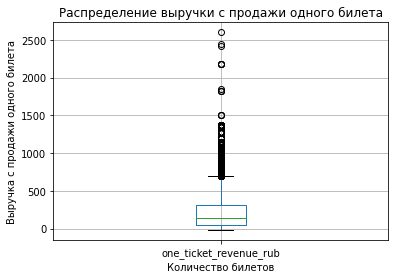

In [166]:
#Также проверим данные на выбросы по полю one_ticket_revenue_rub:

df.boxplot('one_ticket_revenue_rub');

plt.title('Распределение выручки с продажи одного билета')
plt.xlabel('Количество билетов')
plt.ylabel('Выручка с продажи одного билета')

In [167]:
#Отберем данные по выручке с продажи одного билета по 99 процентилю:

outliers_one_ticket_revenue = df['one_ticket_revenue_rub'].quantile(0.99)

In [168]:
df = df.loc[df['one_ticket_revenue_rub']<outliers_one_ticket_revenue]

In [169]:
#Создадим столбец month, в котором выделим месяц оформления заказа в отдельный столбец.

df['month'] = df['created_dt_msk'].dt.month

In [170]:
#Создадим столбец season с информацией о сезонности:

def get_season(month):
    if month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

df['season'] = df['month'].apply(get_season)

In [171]:
def get_month(month):
    if month == 6:
        return 'июнь'
    elif month == 7:
        return 'июль'
    elif month == 8:
        return 'август'
    elif month == 9:
        return 'сентябрь'
    else:
        return 'октябрь'

df['month_name'] = df['month'].apply(get_month)

In [172]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280586 entries, 0 to 290609
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                280586 non-null  int64         
 1   user_id                 280586 non-null  object        
 2   created_dt_msk          280586 non-null  datetime64[ns]
 3   created_ts_msk          280586 non-null  datetime64[ns]
 4   event_id                280586 non-null  int64         
 5   cinema_circuit          280586 non-null  object        
 6   age_limit               280586 non-null  int64         
 7   currency_code           280586 non-null  object        
 8   device_type_canonical   280586 non-null  object        
 9   revenue                 280586 non-null  float64       
 10  service_name            280586 non-null  object        
 11  tickets_count           280586 non-null  int64         
 12  total                   280586

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season,month_name
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",100,18.6972,kzt,1521.94,380.485000,8,лето,август
1,7431164,024dc5236465850,2024-07-23,2024-07-23 20:52:02,169230,нет,16,rub,mobile,1902.42,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",100,18.3419,kzt,1902.42,380.484000,7,лето,июль
2,7431106,024dc5236465850,2024-07-23,2024-07-23 20:54:19,169230,нет,16,rub,mobile,1141.45,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",100,18.3419,kzt,1141.45,380.483333,7,лето,июль
3,7431135,024dc5236465850,2024-07-23,2024-07-23 20:59:44,169230,нет,16,rub,mobile,1902.42,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",100,18.3419,kzt,1902.42,380.484000,7,лето,июль
4,7431048,024dc5236465850,2024-07-23,2024-07-23 21:02:08,169230,нет,16,rub,mobile,1521.94,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",100,18.3419,kzt,1521.94,380.485000,7,лето,июль


Изучим распределение категориальных данных по столбцам 'currency_code', 'device_type_canonical', 'service_name', 'event_type_main', 'region_name' и 'age limit'.

Для удобства визуализируем значения.

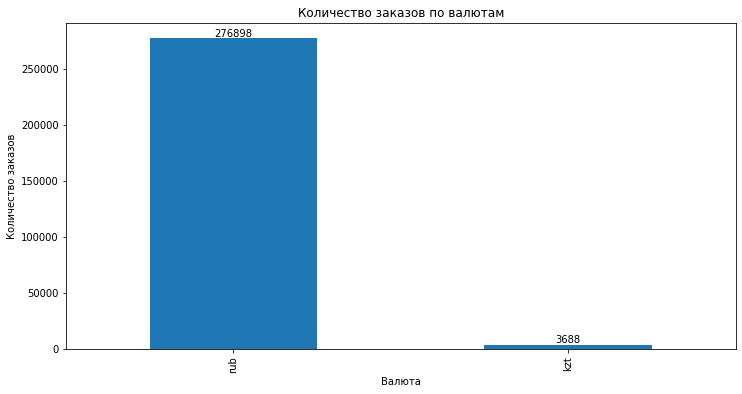

In [173]:
currency_count = df['currency_code'].value_counts()

сс = currency_count.plot(kind='bar', figsize=(12, 6))


plt.title('Количество заказов по валютам')
plt.xlabel('Валюта')
plt.ylabel('Количество заказов')


for p in сс.patches:
    сс.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

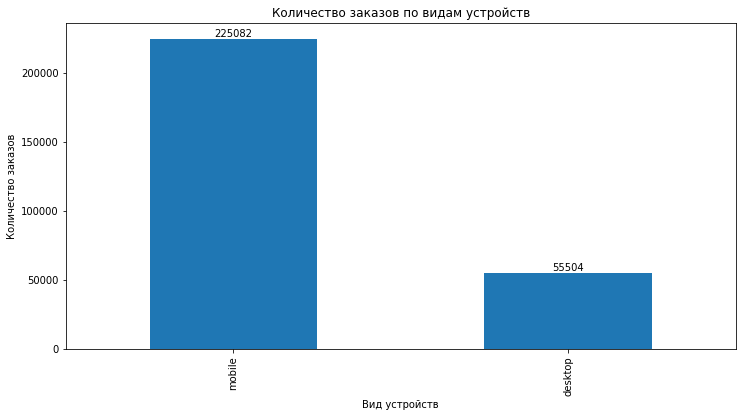

In [174]:
device_type_count = df['device_type_canonical'].value_counts()

dc = device_type_count.plot(kind='bar', figsize=(12, 6))


plt.title('Количество заказов по видам устройств')
plt.xlabel('Вид устройств')
plt.ylabel('Количество заказов')


for p in dc.patches:
    dc.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

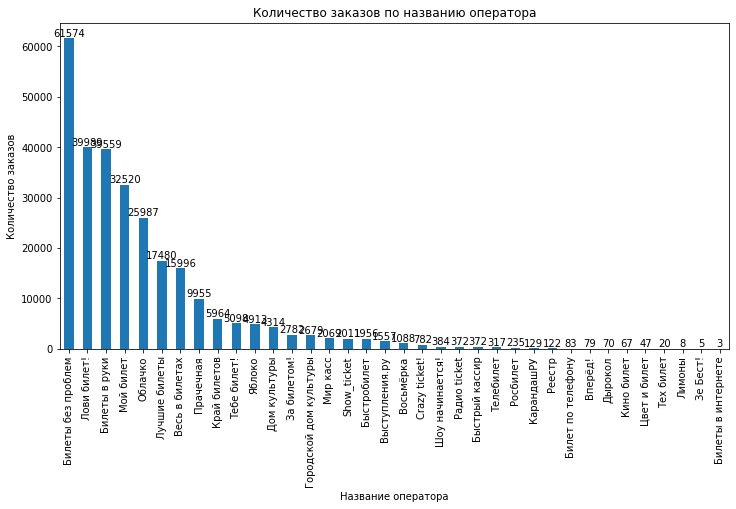

In [175]:
service_count = df['service_name'].value_counts()

sc = service_count.plot(kind='bar', figsize=(12, 6))


plt.title('Количество заказов по названию оператора')
plt.xlabel('Название оператора')
plt.ylabel('Количество заказов')


for p in sc.patches:
    sc.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

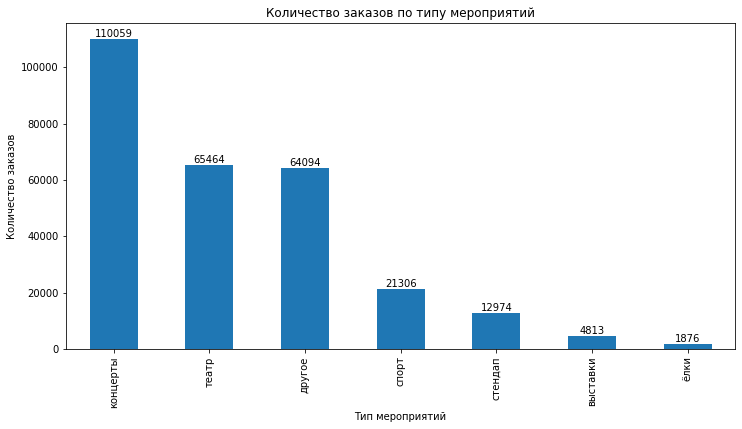

In [176]:
event_count = df['event_type_main'].value_counts()

eс = event_count.plot(kind='bar', figsize=(12, 6))


plt.title('Количество заказов по типу мероприятий')
plt.xlabel('Тип мероприятий')
plt.ylabel('Количество заказов')


for p in eс.patches:
    eс.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

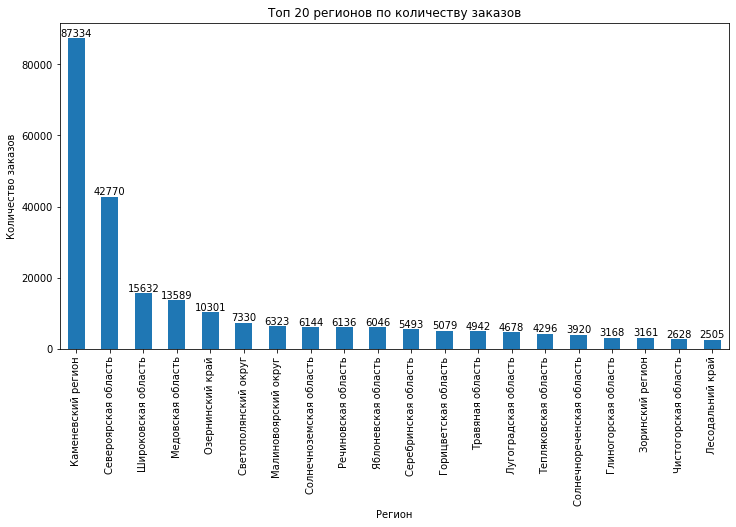

In [177]:
#Поскольку регионов очень много, визуализируем только топ-20 регионов по количеству заказов:

region_count = df['region_name'].value_counts().head(20)

rс = region_count.plot(kind='bar', figsize=(12, 6))


plt.title('Топ 20 регионов по количеству заказов')
plt.xlabel('Регион')
plt.ylabel('Количество заказов')


for p in rс.patches:
    rс.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

In [178]:
df['region_name'].value_counts()

Каменевский регион          87334
Североярская область        42770
Широковская область         15632
Медовская область           13589
Озернинский край            10301
                            ...  
Лесноярский край               19
Крутоводский регион            18
Верхозёрский край              11
Сосноводолинская область       10
Теплоозёрский округ             7
Name: region_name, Length: 81, dtype: int64

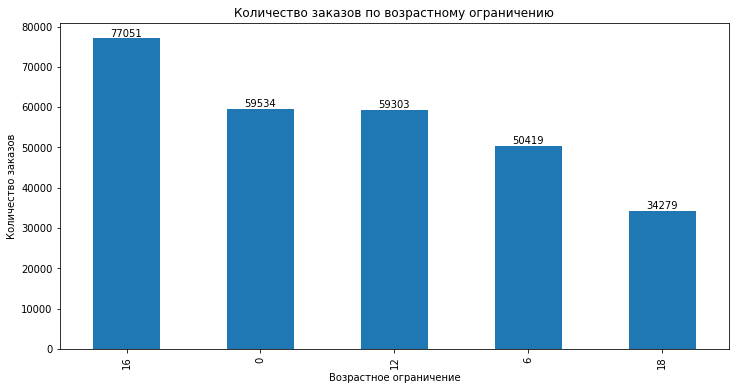

In [179]:
age_count = df['age_limit'].value_counts()

aс = age_count.plot(kind='bar', figsize=(12, 6))


plt.title('Количество заказов по возрастному ограничению')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Количество заказов')


for p in aс.patches:
    aс.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

Анализ категориальных данных показал отсутствие аномалий - скрытых дубликатов, ошибок, неявных пропусков. 

In [180]:
#Оценим потери после обработки данных:

df_orders.shape[0] - df.shape[0]

10263

In [181]:
(1 - df.shape[0]/df_orders.shape[0])*100

3.528635133694802

Данные сократились на 7370 строк или на 2,5%.

Были проанализированы данные по покупке билетов для Яндекс Афиши из двух датафреймов: по заказам и по событиям. Данные по выручке были приведены к единой валюте (рублям), также был проведен анализ по выбросам для выручки и количества билетов. После анализа выбросов были отобраны данные по 99 процентилю. Также были созданы новые столбцы с данными по выручке в рублях, месяцу заказа и выручке с продажи одного билета на мероприятие. Также был проведен анализ по выбросам для выручке с продажи одного билета на мероприятие и также отобраны по 99 процентилю. В итоге данных стало на 2,5% меньше чем было изначально.

Анализ категориальных данных показал отсутствие аномалий - скрытых дубликатов, ошибок, неявных пропусков.

# Исследовательский анализ данных

In [182]:
#Объединим данные для расчета количества заказов по месяцам, затем визуализируем их:

orders_by_month = df.groupby('month_name')['order_id'].count()

In [183]:
month_order = ['июнь', 'июль', 'август', 'сентябрь', 'октябрь']

orders_by_month = orders_by_month.reindex(month_order)

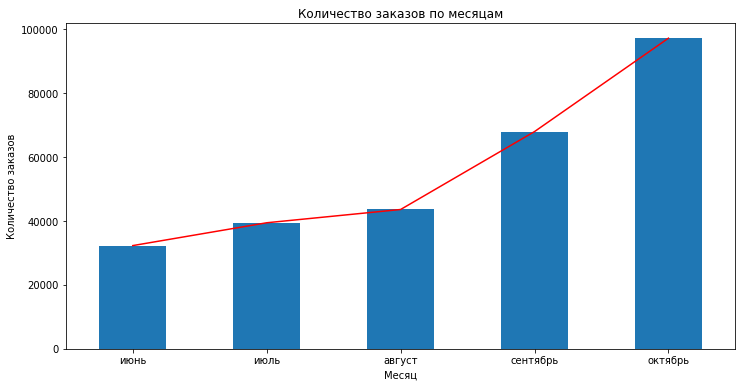

In [184]:
orders_by_month.plot(kind='bar', figsize=(12, 6))
orders_by_month.plot(kind='line', color='red')

plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')

plt.show()

Увеличение заказов от июня к ноябрю 2024 года фиксируется. Видно незначительное увеличение заказов с июня по август и сильный рост с авугста по ноябрь.

In [185]:
#Объединим данные для расчета доли количества заказов по типу мероприятия по сезонам, затем визуализируем их:

orders_by_events = df.groupby(['event_type_main', 'season'])['order_id'].count()

In [186]:
orders_by_events = orders_by_events.unstack('season')

In [187]:
orders_by_events = orders_by_events.div(orders_by_events.sum(axis=1), axis=0) * 100

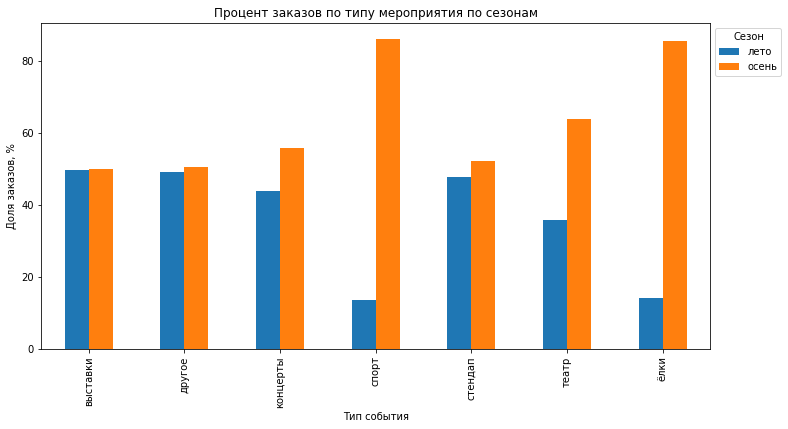

In [188]:
orders_by_events.plot(kind = 'bar', figsize=(12, 6))

plt.title('Процент заказов по типу мероприятия по сезонам')
plt.xlabel('Тип события')
plt.ylabel('Доля заказов, %')
plt.legend(title='Сезон', bbox_to_anchor=(1, 1))

In [189]:
#Объединим данные для расчета доли количества заказов по типу устройств по сезонам, затем визуализируем их:

orders_by_devices = df.groupby(['device_type_canonical', 'season'])['order_id'].count()

In [190]:
orders_by_devices = orders_by_devices.unstack('season')

In [191]:
orders_by_devices = orders_by_devices.div(orders_by_devices.sum(axis=1), axis=0) * 100

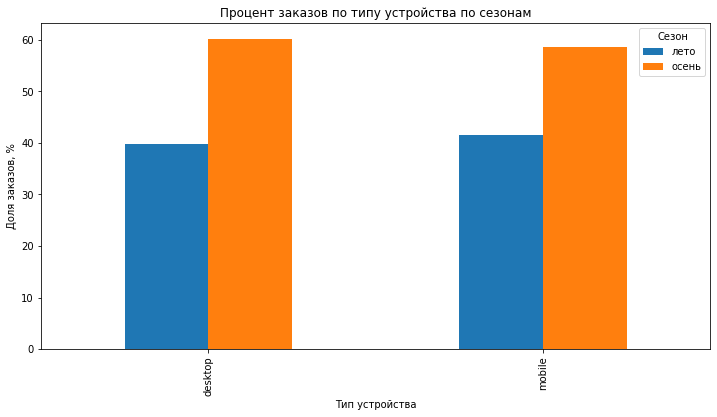

In [192]:
orders_by_devices.plot(kind = 'bar', figsize=(12, 6))

plt.title('Процент заказов по типу устройства по сезонам')
plt.xlabel('Тип устройства')
plt.ylabel('Доля заказов, %')
plt.legend(title='Сезон', bbox_to_anchor=(1, 1))

In [193]:
#Объединим данные для расчета доли количества заказов по возрастному рейтингу по сезонам, затем визуализируем их:

orders_by_age_limit = df.groupby(['age_limit', 'season'])['order_id'].count()

In [194]:
orders_by_age_limit = orders_by_age_limit.unstack('season')

In [195]:
orders_by_age_limit = orders_by_age_limit.div(orders_by_age_limit.sum(axis=1), axis=0)*100

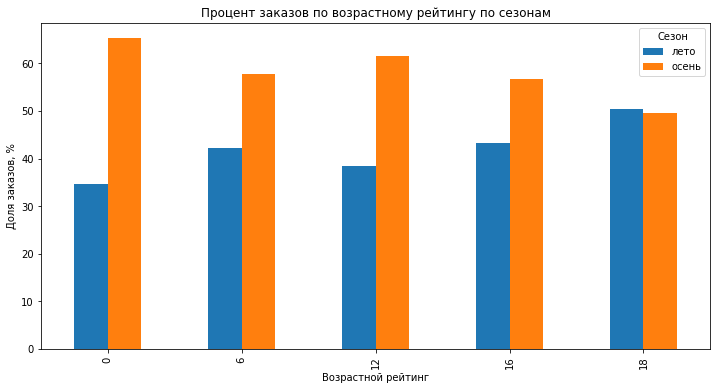

In [196]:
orders_by_age_limit.plot(kind = 'bar', figsize=(12, 6))

plt.title('Процент заказов по возрастному рейтингу по сезонам')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Доля заказов, %')
plt.legend(title='Сезон', bbox_to_anchor=(1, 1))

По типам мероприятий осенью значительно больше доля елок и спортивных мероприятий, а также в 2 раза больше доля театров и чуть больше доля концертов и стендапа, распредление остальных мероприятий примерно одинаковое по сезонам. По типу устройств доля заказов для компьютеров и мобильных больше осенью процентов на 20. По возратсному рейтингу доля всех мероприятий кроме 18+ выше осенью. Для 18+ это соотношение равно. Получается, что для всех этих категорий в осенний период доля мероприятий либо значительно выше либо примерно равна по сравнению с летним периодом.

In [197]:
#Объединим данные для расчета цены билета по типу мероприятий по сезонам, затем визуализируем их:

ticket_revenue_by_event = df.groupby(['event_type_main', 'season'])['one_ticket_revenue_rub'].mean()

In [198]:
ticket_revenue_by_event_un = ticket_revenue_by_event.unstack('season')

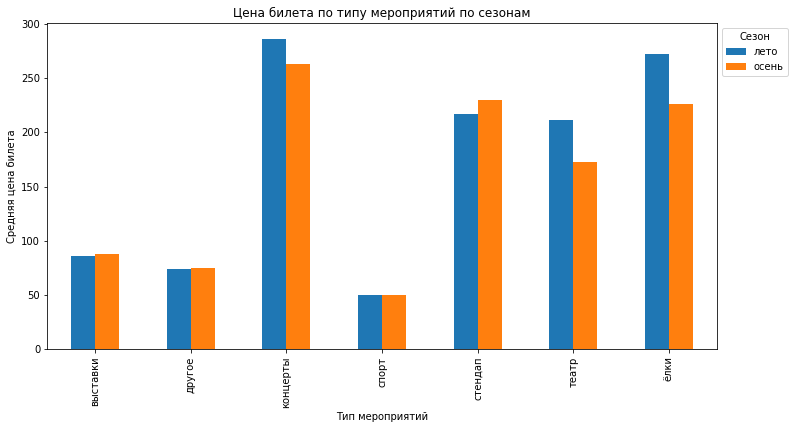

In [199]:
ticket_revenue_by_event_un.plot(kind = 'bar', figsize=(12, 6))

plt.title('Цена билета по типу мероприятий по сезонам')
plt.xlabel('Тип мероприятий')
plt.ylabel('Средняя цена билета')
plt.legend(title='Сезон', bbox_to_anchor=(1, 1))

Различия в цене билета на мероприятия по сезонам менее значительна. Отличия особенно выделяются у елок и театра, цена за которые летом значительно (примерно на 20%) выше. Осенью существенно (также примерно на 20%) выше цена на стендап. Осенью чуть ниже (примерно на 8%) цена на концерты. Цены на остальные мероприятия летом и осенью почти идентичны.

In [200]:
#Посчитаем разницу в заказах по типу мероприятий между летом и осенью, затем визуализируем их:

revenue_by_season = ticket_revenue_by_event.unstack(level='season')

In [201]:
all_revenue = revenue_by_season.sum()

In [202]:
revenue_by_season_percent = revenue_by_season/all_revenue*100

In [203]:
difference = revenue_by_season_percent['лето'] - revenue_by_season_percent['осень']

Text(0, 0.5, 'Разница в заказах, %')

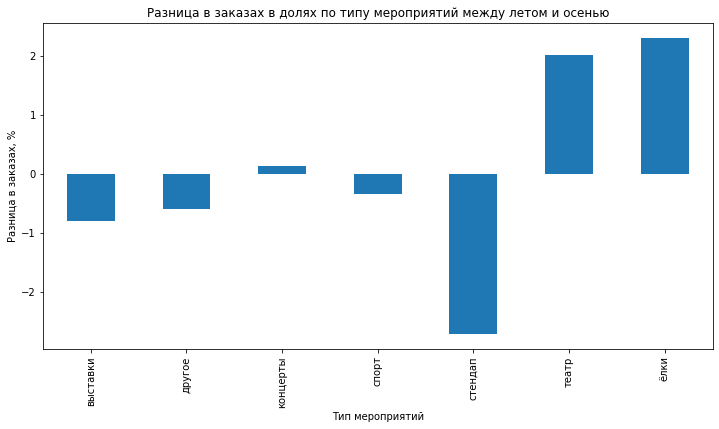

In [204]:
difference.plot(kind = 'bar', figsize=(12, 6))

plt.title('Разница в заказах в долях по типу мероприятий между летом и осенью')
plt.xlabel('Тип мероприятий')
plt.ylabel('Разница в заказах, %')

Театров и елок в относительных величинах летом больше чем осенью (особенно елок). Остальных категорий осенью больше чем летом. Особенно выделяется стендап

In [205]:
#Создадим отдельный столбец для дня недели для дальнейших расчетов и визуализаций:

df['day_of_week_num'] = df['created_dt_msk'].dt.dayofweek

In [206]:
def get_day_week(day_of_week_num):
    if day_of_week_num == 0:
        return 'Понедельник'
    elif day_of_week_num == 1:
        return 'Вторник'
    elif day_of_week_num == 2:
        return 'Среда'
    elif day_of_week_num == 3:
        return 'Четверг'
    elif day_of_week_num == 4:
        return 'Пятница'
    elif day_of_week_num == 5:
        return 'Суббота'
    elif day_of_week_num == 6:
        return 'Воскресенье'

df['day_of_week'] = df['day_of_week_num'].apply(get_day_week)

Создадим отдельный датафрейм для осенних данных с целью визуализации данных по количеству заказов, dau, среднего количества заказов и средней стоимости одного билета осенью и дальнейшей их визуализации.

In [207]:
df_autumn = df[df['season']=='осень']

In [208]:
orders_by_day = df_autumn.groupby('created_dt_msk')['order_id'].count()

Text(0, 0.5, 'Количество заказов')

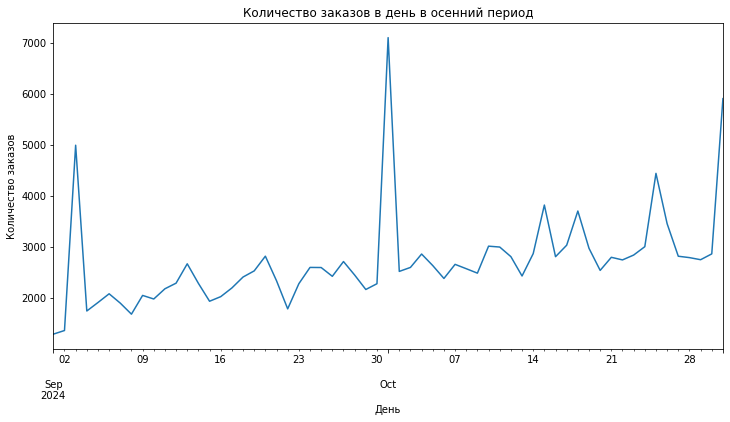

In [209]:
orders_by_day.plot(kind='line', figsize=(12, 6))

plt.title('Количество заказов в день в осенний период')
plt.xlabel('День')
plt.ylabel('Количество заказов')

In [210]:
users_by_day = df_autumn.groupby('created_dt_msk')['user_id'].nunique()

Text(0, 0.5, 'Количество активных пользователей')

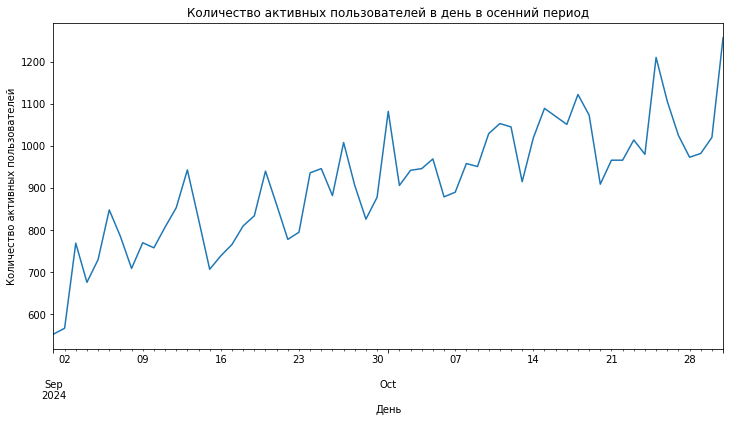

In [211]:
users_by_day.plot(kind='line', figsize=(12, 6))

plt.title('Количество активных пользователей в день в осенний период')
plt.xlabel('День')
plt.ylabel('Количество активных пользователей')

In [212]:
orders_by_user = df_autumn.groupby(['created_dt_msk', 'user_id'])['order_id'].count().reset_index(name='orders_count')

In [213]:
avg_orders_by_user = orders_by_user.groupby('created_dt_msk').orders_count.mean()

Text(0, 0.5, 'Среднее количество заказов на одного пользователя')

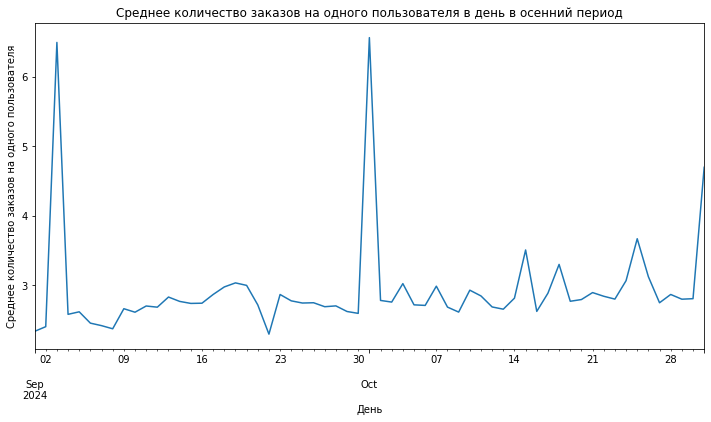

In [214]:
avg_orders_by_user.plot(kind='line', figsize=(12, 6))

plt.title('Среднее количество заказов на одного пользователя в день в осенний период')
plt.xlabel('День')
plt.ylabel('Среднее количество заказов на одного пользователя')

In [215]:
one_ticket_revenue_by_day = df_autumn.groupby('created_dt_msk')['one_ticket_revenue_rub'].mean()

Text(0, 0.5, 'Средняя стоимость одного билета')

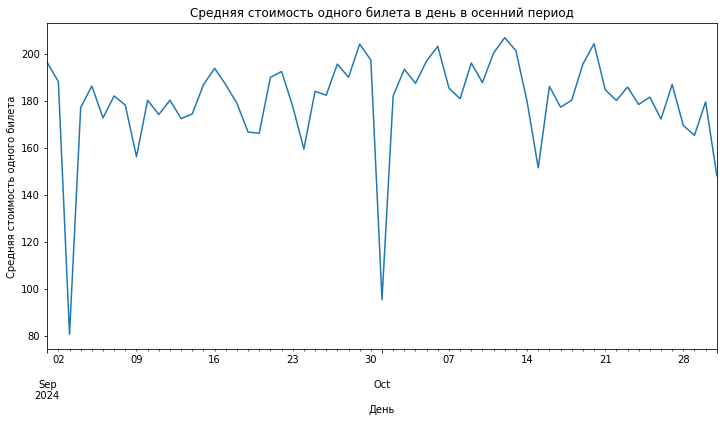

In [216]:
one_ticket_revenue_by_day.plot(kind='line', figsize=(12, 6))

plt.title('Средняя стоимость одного билета в день в осенний период')
plt.xlabel('День')
plt.ylabel('Средняя стоимость одного билета')

По количеству заказов в день и среднему количеству заказов на одного пользователя в день в осенний период наблюдается плавное увеличение показателей на всем протяжении исследования Наблюдаются три дня с явными максимальными всплесками - в самом начале, в середине и в конце исследования. Параметр DAU в осенний период демонстрирует плавное увеличение с волнообразной структурой. Показатель средней стоимости одного билета имеет скачкообразную структуру без явной тенденции к увеличению или снижению. В начале и в середине периода наблюдаются 2 точки явного проседания этого показателя.

Общий вывод: количество активных пользователей и количество заказов в целом имеет тенденцию к росту, средняя стоиомтсь одного билета в целом остается неизменной.

Затем сравним данные по дням недели. 

In [217]:
orders_by_day_week = df_autumn.groupby('day_of_week')['order_id'].count()

In [218]:
day_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

orders_by_day_week = orders_by_day_week.reindex(day_order)

Text(0, 0.5, 'День недели')

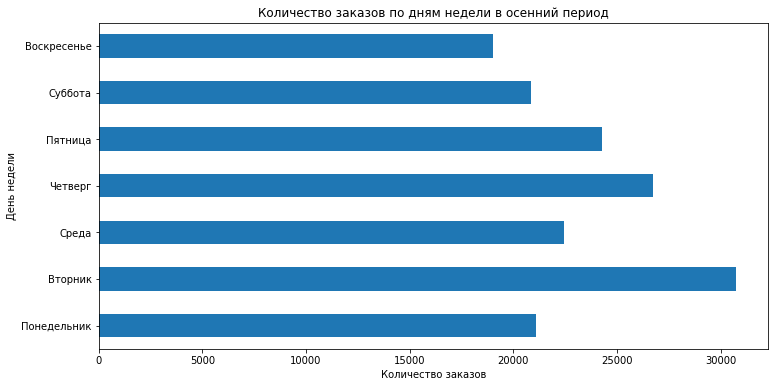

In [219]:
orders_by_day_week.plot(kind='barh', figsize=(12, 6))

plt.title('Количество заказов по дням недели в осенний период')
plt.xlabel('Количество заказов')
plt.ylabel('День недели')

In [220]:
users_by_day_week = df_autumn.groupby('day_of_week')['user_id'].nunique()

In [221]:
day_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

users_by_day_week = users_by_day_week.reindex(day_order)

Text(0, 0.5, 'День недели')

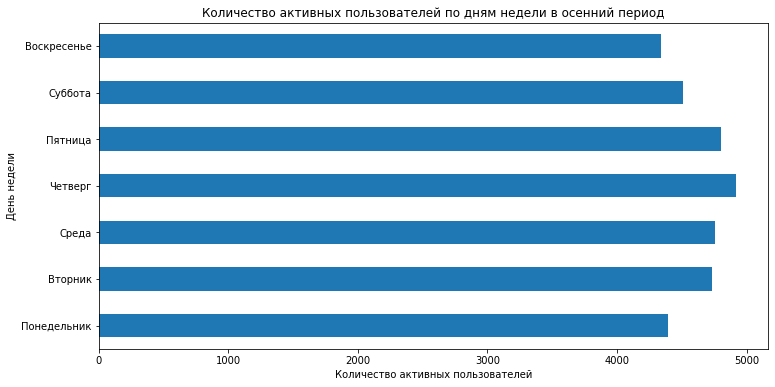

In [222]:
users_by_day_week.plot(kind='barh', figsize=(12, 6))

plt.title('Количество активных пользователей по дням недели в осенний период')
plt.xlabel('Количество активных пользователей')
plt.ylabel('День недели')

In [223]:
orders_by_user_by_day_week = df_autumn.groupby(['day_of_week', 'user_id'])['order_id'].count().reset_index(name='orders_count')

In [224]:
avg_orders_by_user_by_day_week = orders_by_user_by_day_week.groupby('day_of_week').orders_count.mean()

In [225]:
day_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

avg_orders_by_user_by_day_week = avg_orders_by_user_by_day_week.reindex(day_order)

Text(0, 0.5, 'День недели')

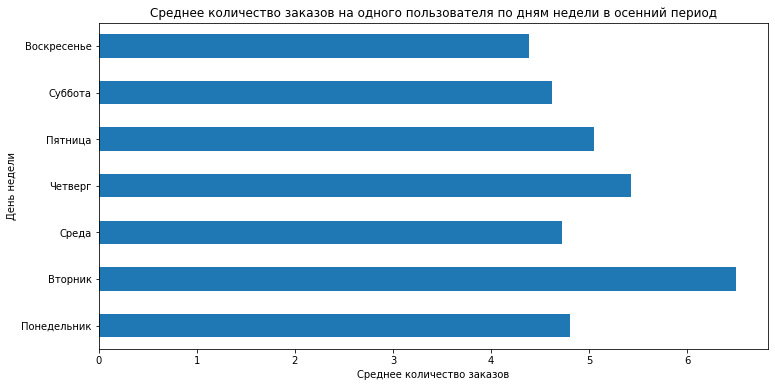

In [226]:
avg_orders_by_user_by_day_week.plot(kind='barh', figsize=(12, 6))

plt.title('Среднее количество заказов на одного пользователя по дням недели в осенний период')
plt.xlabel('Среднее количество заказов')
plt.ylabel('День недели')

In [227]:
one_ticket_revenue_by_day_week = df_autumn.groupby('day_of_week')['one_ticket_revenue_rub'].mean()

In [228]:
day_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

one_ticket_revenue_by_day_week = one_ticket_revenue_by_day_week.reindex(day_order)

Text(0, 0.5, 'День недели')

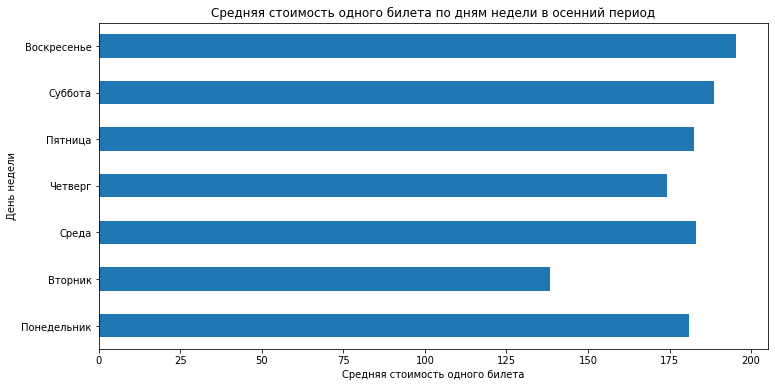

In [229]:
one_ticket_revenue_by_day_week.plot(kind='barh', figsize=(12, 6))

plt.title('Средняя стоимость одного билета по дням недели в осенний период')
plt.xlabel('Средняя стоимость одного билета')
plt.ylabel('День недели')

По количеству заказов, количеству активных пользователей и среднему количеству заказов на одного пользователя по дням недели явное преимущество у будней, в выходные эти показатели существенно ниже. Однозначным лидером по всем этим показателям является вторник. Затем идут четверг и пятница. Средняя стоимость одного билета выше в выходные дни, что логично.

Общий вывод: пользовательская активность выше в будни дни, особенно во вторник.

Проверим информацию по регионам и билетным партенрам. Выведим лидеров по количеству заказов и мероприятий в этих категориях.

In [230]:
events_by_region = df.groupby('region_name')['event_id'].nunique().sort_values(ascending=False)

Text(0, 0.5, 'Количество мероприятий')

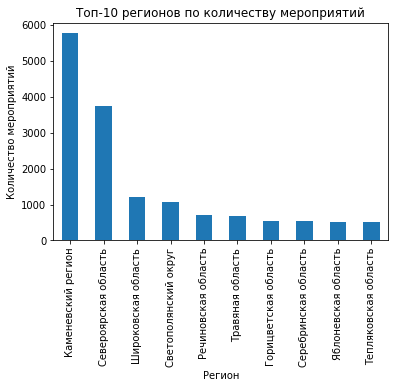

In [231]:
events_by_region.nlargest(10).plot(kind='bar')

plt.title('Топ-10 регионов по количеству мероприятий')
plt.xlabel('Регион')
plt.ylabel('Количество мероприятий')

In [232]:
total_events = events_by_region.sum()

In [233]:
percent_events_by_region = ((events_by_region/total_events)*100).sort_values(ascending=False)

Text(0, 0.5, 'Доля мероприятий от общего числа, %')

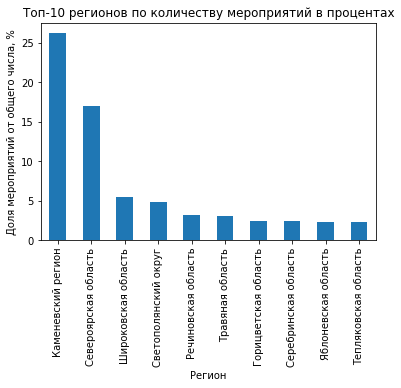

In [234]:
percent_events_by_region.nlargest(10).plot(kind='bar')

plt.title('Топ-10 регионов по количеству мероприятий в процентах')
plt.xlabel('Регион')
plt.ylabel('Доля мероприятий от общего числа, %')

In [235]:
orders_by_region = df.groupby('region_name')['order_id'].count().sort_values(ascending=False)

Text(0, 0.5, 'Количество заказов')

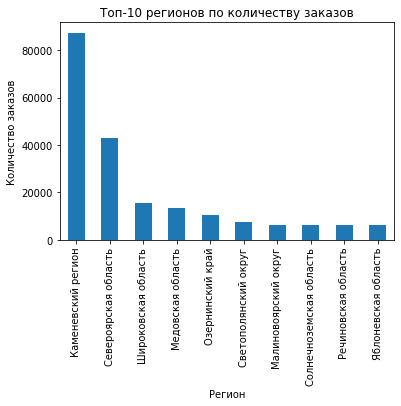

In [236]:
orders_by_region.nlargest(10).plot(kind='bar')

plt.title('Топ-10 регионов по количеству заказов')
plt.xlabel('Регион')
plt.ylabel('Количество заказов')

In [237]:
total_orders = orders_by_region.sum()

In [238]:
percent_orders_by_region = ((orders_by_region/total_orders)*100).sort_values(ascending=False)

Text(0, 0.5, 'Доля заказов от общего числа, %')

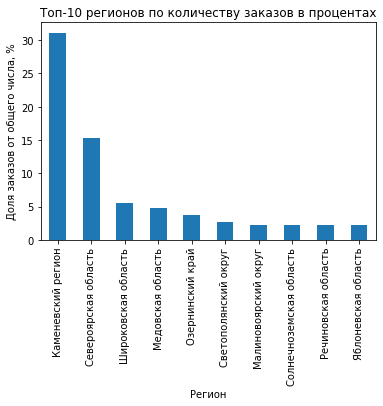

In [239]:
percent_orders_by_region.nlargest(10).plot(kind='bar')

plt.title('Топ-10 регионов по количеству заказов в процентах')
plt.xlabel('Регион')
plt.ylabel('Доля заказов от общего числа, %')

И по количеству мероприятий и по количеству заказов явно лидируют Каменевский регион и Североярская область. По количеству мероприятий у Каменевского района 27% от общего числа, у Североярского - примерно 17%. По количеству заказов долевое соотношение схожее - 30% у Каменевского района и 15% - у Североярского. Дальнейшее название районов среди топ 10 позиций схожее и варьируется от 2 до 6% для этих двух показателей. То есть разбивка показателей весьма неоднородная. Выявлены два явных лидера - Каменевский и Североярский районы.

In [240]:
events_by_service_name = df.groupby('service_name')['event_id'].nunique().sort_values(ascending=False)

Text(0, 0.5, 'Количество мероприятий')

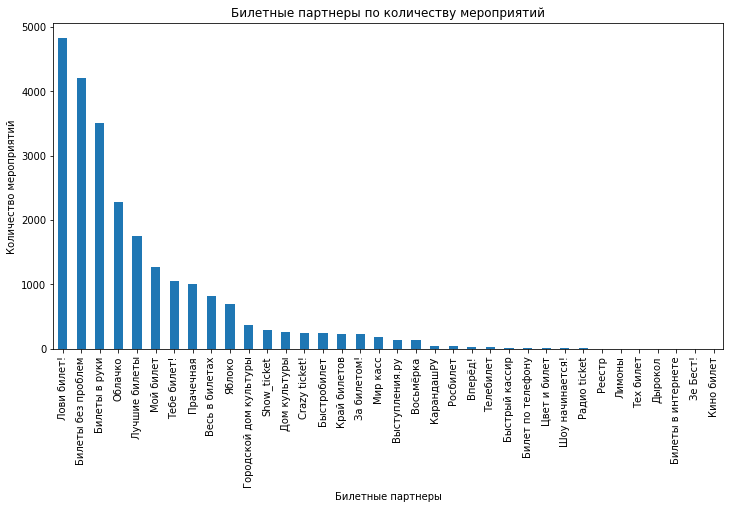

In [241]:
events_by_service_name.plot(kind='bar', figsize=(12, 6))

plt.title('Билетные партнеры по количеству мероприятий')
plt.xlabel('Билетные партнеры')
plt.ylabel('Количество мероприятий')

In [242]:
percent_events_by_service_name = ((events_by_service_name/total_events)*100).sort_values(ascending=False)

Text(0, 0.5, 'Доля мероприятий от общего числа, %')

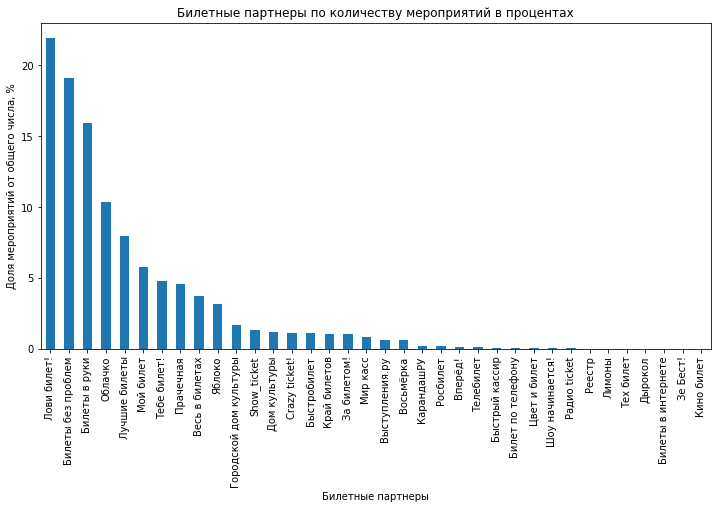

In [243]:
percent_events_by_service_name.plot(kind='bar', figsize=(12, 6))

plt.title('Билетные партнеры по количеству мероприятий в процентах')
plt.xlabel('Билетные партнеры')
plt.ylabel('Доля мероприятий от общего числа, %')

In [244]:
orders_by_service_name = df.groupby('service_name')['order_id'].count().sort_values(ascending=False)

Text(0, 0.5, 'Количество заказов')

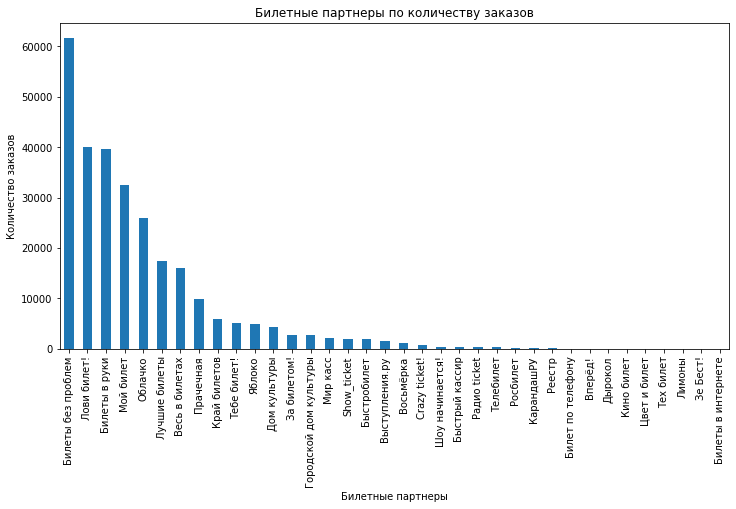

In [245]:
orders_by_service_name.plot(kind='bar', figsize=(12, 6))

plt.title('Билетные партнеры по количеству заказов')
plt.xlabel('Билетные партнеры')
plt.ylabel('Количество заказов')

In [246]:
percent_orders_by_service_name = (orders_by_service_name/total_orders*100).sort_values(ascending=False)

Text(0, 0.5, 'Доля заказов от общего числа, %')

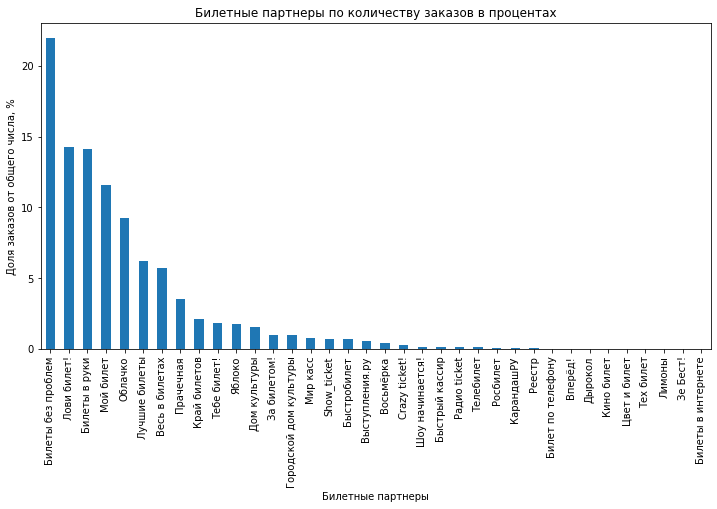

In [247]:
percent_orders_by_service_name.plot(kind='bar', figsize=(12, 6))

plt.title('Билетные партнеры по количеству заказов в процентах')
plt.xlabel('Билетные партнеры')
plt.ylabel('Доля заказов от общего числа, %')

In [248]:
revenue_by_service_name = df.groupby('service_name')['revenue_rub'].sum().sort_values(ascending=False)

Text(0, 0.5, 'Суммарная выручка, млрд. руб.')

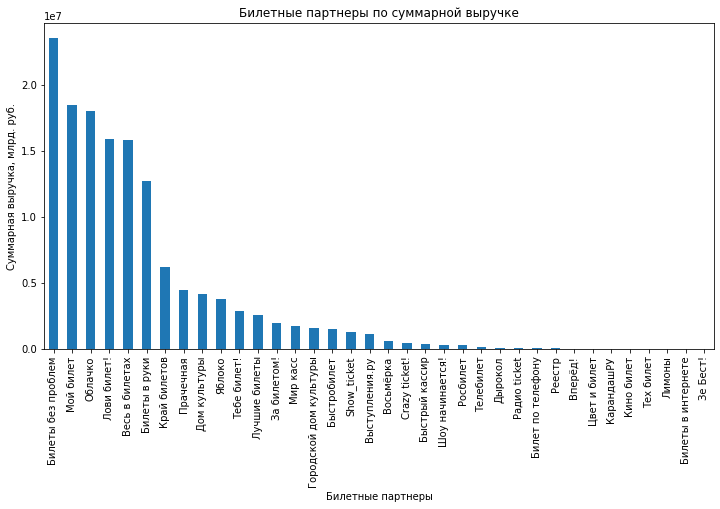

In [249]:
revenue_by_service_name.plot(kind='bar', figsize=(12, 6))

plt.title('Билетные партнеры по суммарной выручке')
plt.xlabel('Билетные партнеры')
plt.ylabel('Суммарная выручка, млрд. руб.')

In [250]:
all_revenue = revenue_by_service_name.sum()

In [251]:
percent_revenue_by_service_name = (revenue_by_service_name/all_revenue*100).sort_values(ascending=False)

Text(0, 0.5, 'Доля суммарной выручки, %')

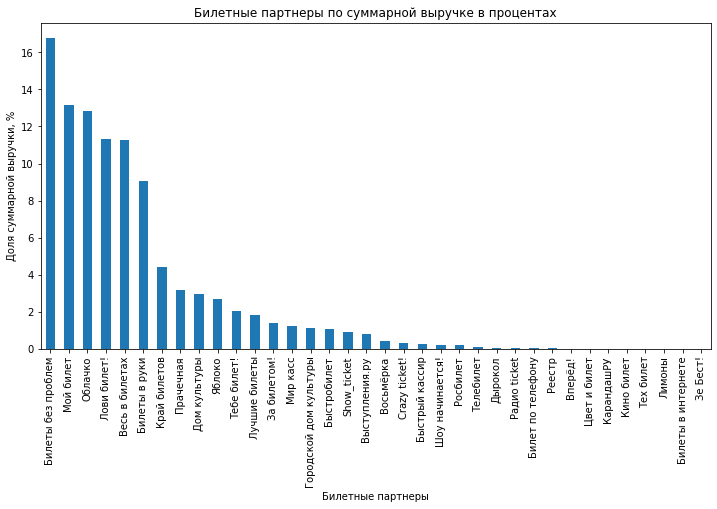

In [252]:
percent_revenue_by_service_name.plot(kind='bar', figsize=(12, 6))

plt.title('Билетные партнеры по суммарной выручке в процентах')
plt.xlabel('Билетные партнеры')
plt.ylabel('Доля суммарной выручки, %')

Среди билетных партнеров такого явного лидертсва как у регионов не наблюдается. Однако судя по трем параметрам можно выделить лидеров неявных. Во всех категориях в топ-5 лидеров вошли 3 билетных партнера - "Лови билет", "Билеты в руки" и "Билеты без проблем". При чем "Билеты без проблем" можно назвать лидером, так как эта организация занимает первое место по суммарной выручке и по количеству заказов и второе место по количеству мероприятий. 

Разброс лидертсва по билетным тоже более диверсифицированный чем по регионам. Топ-5 по количеству мероприятий колеблются в диапазоне от 8 до 23%. Затем идет плавное снижение до 4% в топ-10.По количеству заказов тенденция примерно та же. По количеству выручки топ-5 занимает меньшую долю и колеблется от 10 до 17%, однако после топ-6 происхолит сильное долевое снижение показателей.

# Статистический анализ данных

In [253]:
#Создадим датафремы, в которых будут отобраны лишь данные для мобильных и компьютеров:

df_mobile = df_autumn[df_autumn['device_type_canonical']=='mobile']

In [254]:
df_desktop = df_autumn[df_autumn['device_type_canonical']=='desktop']

In [255]:
mobile_tickets_by_user = df_mobile.groupby('user_id')['tickets_count'].sum().reset_index(name='mobile_tickets_total')

In [256]:
desktop_tickets_by_user = df_desktop.groupby('user_id')['tickets_count'].sum().reset_index(name='desktop_tickets_total')

In [257]:
import seaborn as sns

Text(0, 0.5, 'Плотность распределения')

<Figure size 720x432 with 0 Axes>

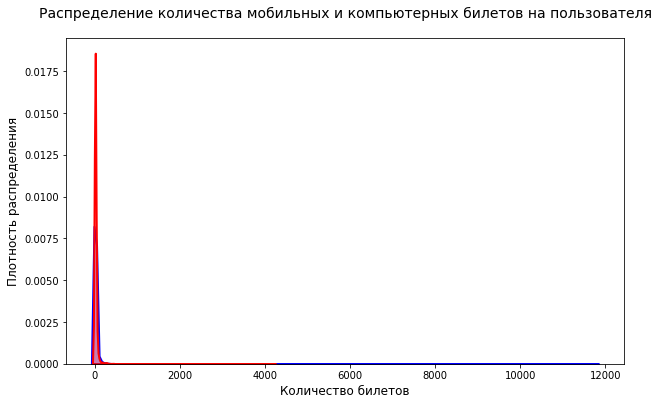

In [258]:
#Проверим данные на плотность распределения:  

plt.figure(figsize=(10, 6)) 

plt.figure(figsize=(10, 6)) 

sns.kdeplot(mobile_tickets_by_user['mobile_tickets_total'],
            color='blue',
            linewidth=2,
            fill=True,  
            alpha=0.3) 

sns.kdeplot(desktop_tickets_by_user['desktop_tickets_total'],
           color='red',
            linewidth=2,
            fill=True,  
            alpha=0.3)

plt.title('Распределение количества мобильных и компьютерных билетов на пользователя', fontsize=14, pad=20)
plt.xlabel('Количество билетов', fontsize=12)
plt.ylabel('Плотность распределения', fontsize=12)

Text(0, 0.5, 'Плотность распределения')

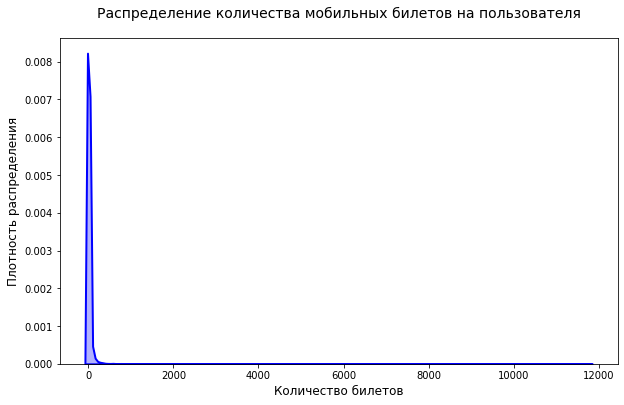

In [259]:
plt.figure(figsize=(10, 6))  

sns.kdeplot(data=mobile_tickets_by_user['mobile_tickets_total'],
            color='blue',
            linewidth=2,
            fill=True,  
            alpha=0.3) 

plt.title('Распределение количества мобильных билетов на пользователя', fontsize=14, pad=20)
plt.xlabel('Количество билетов', fontsize=12)
plt.ylabel('Плотность распределения', fontsize=12)

Text(0, 0.5, 'Плотность распределения')

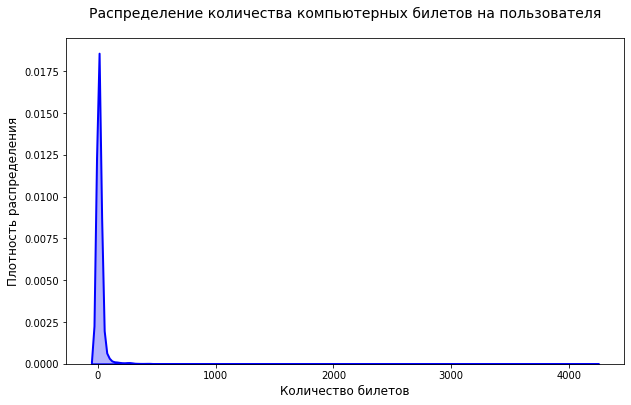

In [260]:
plt.figure(figsize=(10, 6)) 

sns.kdeplot(desktop_tickets_by_user['desktop_tickets_total'],
            color='blue',
            linewidth=2,
            fill=True,  
            alpha=0.3) 

plt.title('Распределение количества компьютерных билетов на пользователя', fontsize=14, pad=20)
plt.xlabel('Количество билетов', fontsize=12)
plt.ylabel('Плотность распределения', fontsize=12)

Данные ассиметричны. Данных для мобильных примерно в 5 раз больше чем компьютеров. Распределение количества билетов на одного пользователя для двух групп данных примерно идентично. Теперь проверим данные на выбросы.

Text(0, 0.5, 'Количество билетов')

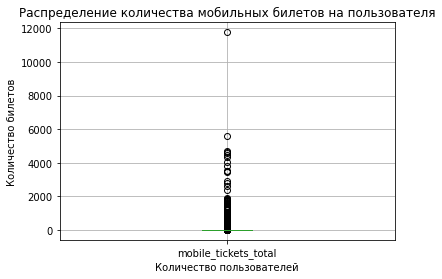

In [261]:
mobile_tickets_by_user.boxplot('mobile_tickets_total');

plt.title('Распределение количества мобильных билетов на пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество билетов')

Text(0, 0.5, 'Количество билетов')

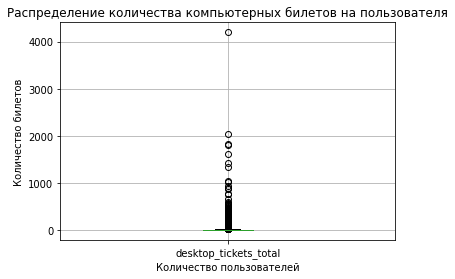

In [262]:
desktop_tickets_by_user.boxplot('desktop_tickets_total');

plt.title('Распределение количества компьютерных билетов на пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество билетов')

В двух случаях выбросов очень много. Значит нужно проводить выборку по процентилям.

In [263]:
#Отберем данные по выручке с продажи одного билета по 89 процентилю (дальнейшие попытки построить ящик с усами показали, что подходит именно этот процентиль):

outliers_mobile_tickets_by_user = mobile_tickets_by_user['mobile_tickets_total'].quantile(0.89)

In [264]:
mobile_tickets_by_user = mobile_tickets_by_user.loc[mobile_tickets_by_user['mobile_tickets_total']<outliers_mobile_tickets_by_user]

Text(0, 0.5, 'Количество билетов')

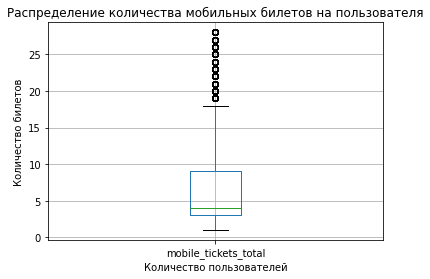

In [265]:
mobile_tickets_by_user.boxplot('mobile_tickets_total');

plt.title('Распределение количества мобильных билетов на пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество билетов')

In [266]:
#Отберем данные по выручке с продажи одного билета по 89 процентилю (дальнейшие попытки построить ящик с усами показали, что подходит именно этот процентиль):

outliers_desktop_tickets_by_user = desktop_tickets_by_user['desktop_tickets_total'].quantile(0.89)

In [267]:
desktop_tickets_by_user = desktop_tickets_by_user.loc[desktop_tickets_by_user['desktop_tickets_total']<outliers_desktop_tickets_by_user]

Text(0, 0.5, 'Количество билетов')

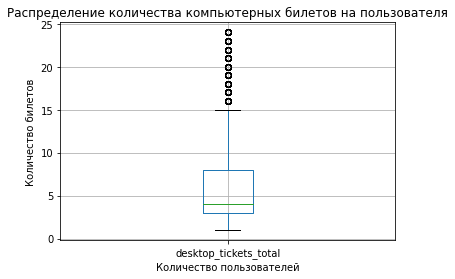

In [268]:
desktop_tickets_by_user.boxplot('desktop_tickets_total');

plt.title('Распределение количества компьютерных билетов на пользователя')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество билетов')

Данные отфильтрованы по 89 процентилям. Для статистического анализа нужен тест Уэлча, так как выборки сильно отличаются по размеру.

Сформируем гипотезу.

Гипотеза звучит так: среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.

- Нулевая гипотеза H₀: среднее количество заказов на одного пользователя на одного пользователя мобильного приложения не выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.

- Альтернативная гипотеза H₁: среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.

In [269]:
mobile_counts = mobile_tickets_by_user['mobile_tickets_total']

In [270]:
desktop_counts = desktop_tickets_by_user['desktop_tickets_total']

In [271]:
ttest_result = st.ttest_ind(mobile_counts, desktop_counts, alternative = 'greater', equal_var = False)

In [272]:
alpha = 0.05

In [273]:
print(ttest_result.pvalue)

if ttest_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Среднее количество заказов на одного пользователя мобильного приложения не выше по сравнению с пользователями стационарных устройств.')

1.6182559094652552e-07
Отвергаем нулевую гипотезу. Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.


In [274]:
#Создадим данные для показателей среднего времени между заказами для мобильных и компьютеров:

mobile_time = df_mobile['days_since_prev'].reset_index(name='days_since_prev')

In [275]:
desktop_time = df_desktop['days_since_prev'].reset_index(name='days_since_prev')

Text(0, 0.5, 'Плотность распределения')

<Figure size 720x432 with 0 Axes>

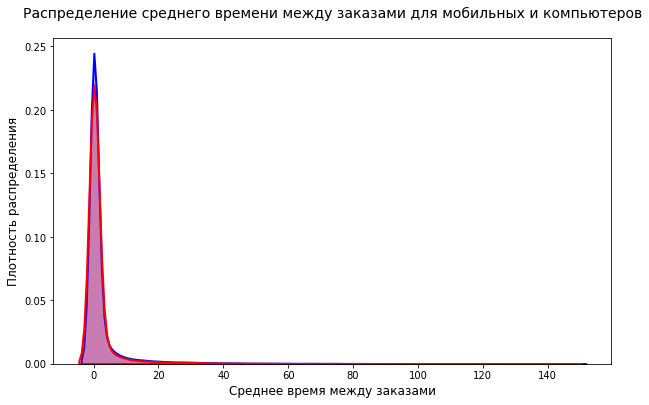

In [276]:
#Проверим данные на плотность распределения:  

plt.figure(figsize=(10, 6)) 

plt.figure(figsize=(10, 6)) 

sns.kdeplot(mobile_time['days_since_prev'],
            color='blue',
            linewidth=2,
            fill=True,  
            alpha=0.3) 

sns.kdeplot(desktop_time['days_since_prev'],
           color='red',
            linewidth=2,
            fill=True,  
            alpha=0.3)

plt.title('Распределение среднего времени между заказами для мобильных и компьютеров', fontsize=14, pad=20)
plt.xlabel('Среднее время между заказами', fontsize=12)
plt.ylabel('Плотность распределения', fontsize=12)

Распределение среднего времени между заказами для мобильных и компьютеров для двух групп данных примерно идентично. Однако данных для мобильных больше. Для статистического анализа нужен тест Уэлча, так как выборки сильно отличаются по размеру.

Сформируем гипотезу.

Гипотеза звучит так: среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Нулевая гипотеза H₀: среднее время между заказами пользователей мобильного приложения не выше по сравнению с пользователями стационарных устройств.

Альтернативная гипотеза H₁: среднее время между заказами пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.

In [277]:
mobile_time_days = mobile_time['days_since_prev']

In [278]:
desktop_time_days = desktop_time['days_since_prev']

In [279]:
ttest_days_result = st.ttest_ind(mobile_time_days, desktop_time_days, alternative = 'greater', equal_var=False)

In [280]:
print(ttest_result.pvalue)

if ttest_result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Среднее время между заказами пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Среднее время между заказами пользователей Среднее время между заказами пользователей мобильного приложения не выше по сравнению с пользователями стационарных устройств.')

1.6182559094652552e-07
Отвергаем нулевую гипотезу. Среднее время между заказами пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.


После статистического анализа данных было выявлено, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо и, что среднее время между заказами пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.

# Общий вывод

Были проанализированы данные по покупке билетов для Яндекс Афиши из двух датафреймов: по заказам и по событиям. Данные по выручке были приведены к единой валюте (рублям), также был проведен анализ по выбросам для выручки, количества билетов и по выручки с продажи одного билета. После анализа выбросов были отобраны данные по 99 процентилю. В итоге данных стало на 2,5% меньше.

Были проанализированы доли количества заказов по месяцам, а также количество заказов по типам мероприятий, устройств и возрастному рейтингу по сезонам.
Количество заказов явно увеличивается в осенний период.
Для всех категорий в осенний период доля мероприятий либо значительно выше либо примерно равна по сравнению с летним периодом.

Также были проанализированы количество заказов в день, среднее количество заказов в день на 1 пользователя, DAU и средняя стоимость одного билета в осенний период. 
Количество активных пользователей и количество заказов в целом имеет тенденцию к росту, средняя стоиомсть одного билета в целом остается неизменной.

Был проведен анализ данных по дням недели, который показал, что пользовательская активность выше в будни дни, особенно во вторник.

И по количеству мероприятий и по количеству заказов по регионам было выявлено 2 явных лидера - Каменевский регион и Североярская область.
Среди билетных партнеров такого явного лидертсва как у регионов не наблюдается. Однако судя по трем параметрам можно выделить лидеров неявных. Во всех категориях (по количеству мероприятий, по количеству заказов и по суммарной выручке) в топ-5 лидеров вошли 3 билетных партнера - "Лови билет", "Билеты в руки" и "Билеты без проблем".

После статистического анализа данных было выявлено, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо и, что среднее время между заказами пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.

Рекомендации: 

- обратить внимание на теартальные мроприятия и на возрастной сегмент 16+. Похоже, что эти виды мероприятий наиболее востребованы;

- DAU и количество заказов имеют тенденцию к росту. Это хорошо. Но нужно обратить внимание на увеличение среднего чека;

- пользовательская активность выше во вторник. В этот день можно запускать акции и делать почие активности;

- стоит обратить внимание на 2 региона - Каменевский регион и Североярская область и выяснить, что делает их лидерами;

- поскольку среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями компьютеров, но при этом пользователи компьютеров совершают заказы быстрее пользователей мобильных, то нужно стимулировать пользователей чаще использовать компьютеры.